## Grupo

227124 Jorge Henrique Monteiro dos Santos

262251 Vitor Mello de Araujo Lima

# MO431A - Tarefa 1

Esse trabalho é um estudo sobre Single Value Decomposition (SVD). Essa técnica fatora uma matriz retangular no produto de três matrizes distintas.

Sendo $A$ uma matriz  retangular $m \times n$ , seu SVD pode ser expresso como:

$$ A = USV^T $$

Onde
* $U$ é uma matriz ortogonal $m \times m$.  
* $S$ é uma matriz diagonal $m \times n$. 
* $V^T$ é uma matriz ortogonal  $n \times n$. 

As matrizes $U$ e $V^T$ são compostas pelas colunas e linhas mais representativas da matriz $A$, respectivamente. Além disso, elas são ordenadas por grau de representatividade.

Os elementos da diagonal da matriz $S$, os valores singulares, quantificam a representatividade de cada uma dessas colunas ou linhas. 

Uma das principais aplicações da informação sobre a representatividade dessas colunas/vetores é a construção de matrizes aproximadas de $A$. Isso é realizado selecionando um subconjunto de $r$ colunas ($U$) e linhas ($V$) mais relevantes que compõem o SVD da matriz $A$. Logo, a matriz aproximada de $A$ pode ser compreendida como a combinação linear dessas $r$ colunas/linhas do SVD. É interessante notar que essa aproximação de $A$ utilizando $r$ vetores é a matriz de rank $r$ que melhor aproxima $A$.

Essa técnica pode ser aplicada em algoritmos de compressão de imagem. Onde uma matriz $m \times n$, que precisa de uma espaço de armazenamento $O(n \times m)$, pode ser representada por uma matriz com custo de armazenmeto $O(k(n + m))$, onde $k$ é a quantidade de colunas/linhas utilizadas. 

Para realizar esse estudo será utilizado uma parte do banco de dados MNIST, que é composto por imagens de números escritos à mão. 

## 1) Lendo o arquivo *dados.npy* e salvando na matrix X

In [55]:
import numpy as np
import matplotlib.pyplot as pp

#1: Lendo o arquivo dados.npy
X = np.load('dados.npy')

## 2) Imprimindo os três primeiros dígitos de X

(-0.5, 27.5, 27.5, -0.5)

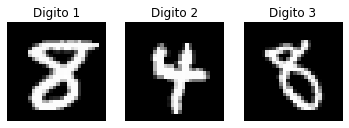

In [56]:
dig0 = np.reshape(X[0],(28,28))
dig1 = np.reshape(X[1],(28,28))
dig2 = np.reshape(X[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1")
axarr[0].axis("off")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2")
axarr[1].axis("off")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3")
axarr[2].axis("off")

## 3 . Fatoração svd da matriz X.

Existem duas formulações para o SVD de uma matriz: _full_matrix_ e compacta. A primeira é a forma descrita anteriormente com a matriz $U$ com dimensões $m \times m$. A segunda forma aproveita o fato que as linhas de $S$ a partir da n-ésima são nulas. Sendo assim, as colunas de $U$ com índice maior que $n$ não agregam informação. Logo, a matriz $U$ pode ser representada como uma matriz $m \times n$, e as linhas abaixo da diagonal de $S$ podem ser descartadas.

 ### Dados com media 0

O algoritmo de SVD truncado, que vai ser analisado na questão 4,  gera o melhor subespaço para representar um determinado conjunto de dados. Todo subespaço deve conter a origem. Logo, para otimizar a performance do SVD é necessario assegurar que ela pertence ao conjunto de dados em análise.

Para isto vamos efetuar a normalização da matriz $X$. O procedimento adotado para esta normalização foi primeiro construir um vetor de médias. Tal vetor é uma linha de 784 posições, onde cada posição contém a média calculada para a respectiva coluna de $X$. Subtrai-se então esse vetor de cada uma das linhas de $X$, obtendo-se a matriz normalizada.

In [57]:
X_mean = np.mean(X, axis=0)
X_norm = X - np.tile(X_mean,(X.shape[0],1))

### Fatoração full_matrix

In [58]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=True)

print("dim U (Full_Matrix) =", U.shape)
print("dim S (Full_Matrix) =", S.shape)
print("dim VT (Full_Matrix) =", VT.shape)

dim U (Full_Matrix) = (10500, 10500)
dim S (Full_Matrix) = (784,)
dim VT (Full_Matrix) = (784, 784)


### Fatoração compacta

In [59]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=False)

print("dim U (Compacta) =", U.shape)
print("dim S (Compacta) =", S.shape)
print("dim VT (Compacta)  =", VT.shape)

dim U (Compacta) = (10500, 784)
dim S (Compacta) = (784,)
dim VT (Compacta)  = (784, 784)


Como esperado, a matriz $U$ passa de uma matriz quadrada $10500 \times 10500$ para uma matriz retangular $10500 \times 784$

## 4 SVD Truncado

### 4.1 Compute a matriz projetada. 

A matriz projetada pode ser compreendida como uma versão da matriz original representada em um subespaço de $r$ dimensões. Cada dado da matrix origial, cada linha/imagem no caso desse trabalho, é projetado nas $r$ (100) dimensões selecionas.


In [60]:
X_proj = U[:, :100] @ np.diag(S)[ :100, :100]
print("Dim (X_projeta): ", X_proj.shape)


Dim (X_projeta):  (10500, 100)


### 4.2 Compute a matriz reconstruida.

Como comentado anteriormente, o SVD pode ser utilizado para construção de matrizes aproximadas. A matriz reconstruida tem rank $r$, cuja base é um conjunto de $r$ vetores pertencentes ao espaço vetorial original Essa matriz possui as mesmas dimensões da matriz original, sendo cada uma de suas linhas uma combinação linear das $r$ primeiras linhas da matriz $V^T$.

In [61]:
X_rec = U[:, :100] @ np.diag(S)[ :100, :100] @ VT[:100, :]

print("Dim (X_reconstruida)", X_rec.shape) 

Dim (X_reconstruida) (10500, 784)


## 5 Impressão do dados reconstruidos 

Como esperado há perda de "informação" nos dados reconstruídos. Entretanto, os números ainda podem ser diferenciados. Logo, é possível observar como esse tipo de algoritmo pode ser utilizado na compressão dados.

(-0.5, 27.5, 27.5, -0.5)

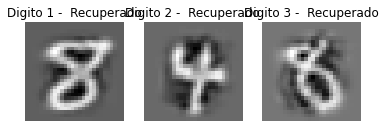

In [62]:
dig0 = np.reshape(X_rec[0],(28,28))
dig1 = np.reshape(X_rec[1],(28,28))
dig2 = np.reshape(X_rec[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1 -  Recuperado")
axarr[0].axis('off')
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2 -  Recuperado")
axarr[1].axis('off')
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3 -  Recuperado")
axarr[2].axis('off')

## 6 - Impressão dos três primeiros _eigen-dígitos_

A principal característica da matriz $V^T$ é que suas linhas representam as linhas mais representativas da matriz em análise. Como cada linha representa um dígito no conjunto de dados analisado, essas linhas são denominadas _eigen-dígitos_ (dígitos característicos). Entretanto, elas poderiam ter nomes diferentes em outros conjuntos de dados:  _eigen-faces_ (no caso de rostos) ou _eigen-dados_.

(-0.5, 27.5, 27.5, -0.5)

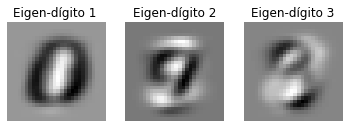

In [63]:
dig0 = np.reshape(VT[0],(28,28))
dig1 = np.reshape(VT[1],(28,28))
dig2 = np.reshape(VT[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Eigen-dígito 1 ")
axarr[0].axis('off')
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Eigen-dígito 2")
axarr[1].axis('off')
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Eigen-dígito 3")
axarr[2].axis('off')



## 7 Decidindo o número de dimensões

A quantidade de dimensões selecionadas é um parâmetro importante na utilização do SVD para gerar matrizes reconstruídas. Essa escolha pode ser baseada em padrões para cada tipo de aplicação ou utilizando os valores singulares calculados pelo SVD.

### 7.1 Quantas dimensões manter usando apenas valores singulares maiores que 1

In [64]:
S_1 = S[S >= 1]

In [65]:
print( "Dim (s > 1) = ", S_1.shape[0])

Dim (s > 1) =  671


### 7.2/7.3 Quantas dimensões manter para capturar 80%/95%  da variância dos dados

Dado que a magnitude dos valores singulares nos indica a quantidade de variância ou energia capturada por eles, é possível saber o quanto da variância total estamos capturando utilizando apenas parte dos valores singulares. Para isso basta somar as magnitudes dos valores singulares utilizados e comparar o valor encontrado com a magnitude total.

In [66]:
S_cum = np.cumsum(S)

S_80 = S_cum[S_cum < np.sum(S)*0.8]
S_95 = S_cum[S_cum < np.sum(S)*0.95]

print("Dim (80% Var) = ", S_80.shape[0])
print("Dim (95% Var) = ", S_95.shape[0])

Dim (80% Var) =  234
Dim (95% Var) =  425


In [67]:
Dados_rec_80 = U[:, :234] @ np.diag(S)[ :234, :234] @ VT[:234, :]
Dados_rec_95 = U[:, :425] @ np.diag(S)[ :425, :425] @ VT[:425, :]

(-0.5, 27.5, 27.5, -0.5)

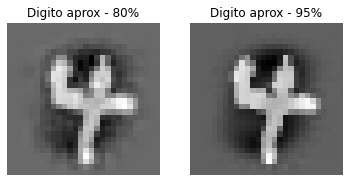

In [68]:
dig0 = np.reshape(Dados_rec_80[1],(28,28))
dig1 = np.reshape(Dados_rec_95[1],(28,28))


f, axarr = pp.subplots(1,2)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito aprox - 80%")
axarr[0].axis('off')
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito aprox - 95%")
axarr[1].axis('off')
